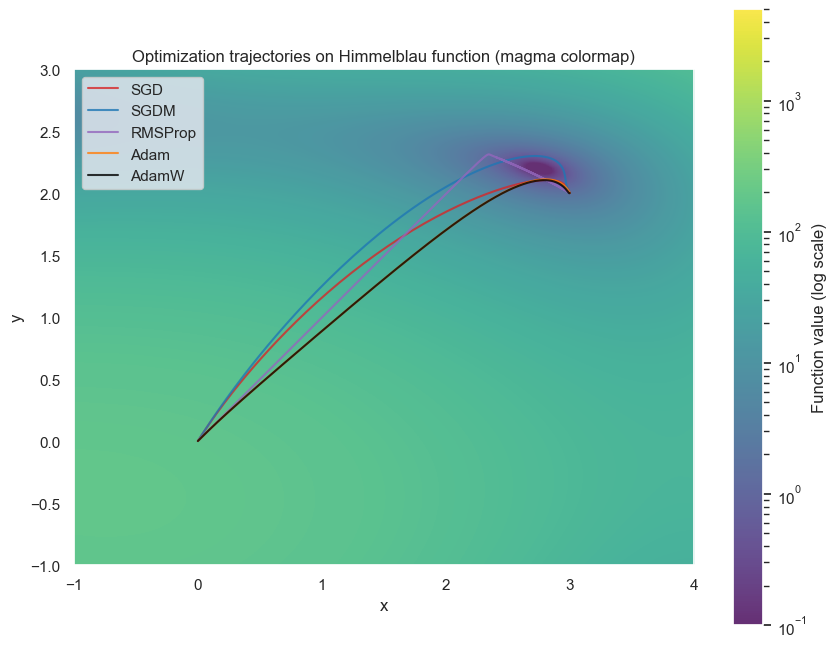

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

sns.set_theme(style="darkgrid")

def f(x):
    X, Y = x[0], x[1]
    return (X**2 + Y - 11)**2 + (X + Y**2 -7)**2

def grad_f(x):
    X, Y = x[0], x[1]
    df_dx = 4*X*(X**2 + Y -11) + 2*(X + Y**2 -7)
    df_dy = 2*(X**2 + Y -11) + 4*Y*(X + Y**2 -7)
    return np.array([df_dx, df_dy])

def plot_background(ax):
    x = np.linspace(-1, 4, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2
    cmap = sns.color_palette("viridis", as_cmap=True)
    im = ax.imshow(Z.T, extent=[-1, 4, -1, 3], origin='lower',
                   norm=LogNorm(vmin=0.1, vmax=5000), cmap=cmap, alpha=0.8)
    return im

num_steps = 10000
x0 = np.array([0, 0])

trajectories = {}

params = {
    'SGD': {'lr': 0.001},
    'SGDM': {'lr': 0.0012, 'beta': 0.85},
    'RMSProp': {'lr': 0.0015, 'beta2': 0.8},
    'Adam': {'lr': 0.002, 'beta1': 0.9, 'beta2': 0.999},
    'AdamW': {'lr': 0.002, 'beta1': 0.9, 'beta2': 0.999, 'weight_decay': 0.01},
}

# SGD
x = x0.copy()
traj_sgd = [x.copy()]
lr_sgd = params['SGD']['lr']
for _ in range(num_steps):
    g = grad_f(x)
    x = x - lr_sgd * g
    traj_sgd.append(x.copy())
trajectories['SGD'] = np.array(traj_sgd)

# SGDM
x = x0.copy()
v = np.zeros_like(x)
beta = params['SGDM']['beta']
lr_sgdm = params['SGDM']['lr']
traj_sgdm = [x.copy()]
for _ in range(num_steps):
    g = grad_f(x)
    v = beta * v + (1 - beta) * g
    x = x - lr_sgdm * v
    traj_sgdm.append(x.copy())
trajectories['SGDM'] = np.array(traj_sgdm)

# RMSProp
x = x0.copy()
s = np.zeros_like(x)
beta2 = params['RMSProp']['beta2']
epsilon = 1e-8
lr_rmsprop = params['RMSProp']['lr']
traj_rmsprop = [x.copy()]
for _ in range(num_steps):
    g = grad_f(x)
    s = beta2 * s + (1 - beta2) * (g**2)
    x = x - lr_rmsprop * g / (np.sqrt(s) + epsilon)
    traj_rmsprop.append(x.copy())
trajectories['RMSProp'] = np.array(traj_rmsprop)

# Adam
x = x0.copy()
m = np.zeros_like(x)
v = np.zeros_like(x)
beta1 = params['Adam']['beta1']
beta2 = params['Adam']['beta2']
epsilon = 1e-8
lr_adam = params['Adam']['lr']
traj_adam = [x.copy()]
for t in range(1, num_steps+1):
    g = grad_f(x)
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * (g**2)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    x = x - lr_adam * m_hat / (np.sqrt(v_hat) + epsilon)
    traj_adam.append(x.copy())
trajectories['Adam'] = np.array(traj_adam)

# AdamW
x = x0.copy()
m = np.zeros_like(x)
v = np.zeros_like(x)
beta1 = params['AdamW']['beta1']
beta2 = params['AdamW']['beta2']
weight_decay = params['AdamW']['weight_decay']
epsilon = 1e-8
lr_adamw = params['AdamW']['lr']
traj_adamw = [x.copy()]
for t in range(1, num_steps+1):
    g = grad_f(x)
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * (g**2)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    x = x - lr_adamw * weight_decay * x
    x = x - lr_adamw * m_hat / (np.sqrt(v_hat) + epsilon)
    traj_adamw.append(x.copy())
trajectories['AdamW'] = np.array(traj_adamw)

fig, ax = plt.subplots(figsize=(10, 8))
im = plot_background(ax)

colors = {
    'SGD': '#d62728',     # 深红
    'SGDM': '#1f77b4',    # 深蓝
    'RMSProp': '#9467bd', # 紫色
    'Adam': '#ff7f0e',    # 橙色
    'AdamW': '#000000',   # 黑色
}


for key, traj in trajectories.items():
    ax.plot(traj[:, 0], traj[:, 1], markersize=2, label=key, color=colors[key], alpha=0.8)

ax.set_xlim([-1, 4])
ax.set_ylim([-1, 3])
ax.set_title("Optimization trajectories on Himmelblau function (magma colormap)")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(False)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Function value (log scale)')

plt.show()
